<a href="https://colab.research.google.com/github/felipefreitasbr/quarentena-de-dados/blob/master/Aula_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [2]:
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv")
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
avaliacoes = pd.read_csv("https://github.com/alura-cursos/introducao-a-data-science/blob/master/aula0/ml-latest-small/ratings.csv?raw=true")
avaliacoes.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [0]:
notas_medias_por_filme = avaliacoes.groupby("movieId")["rating"].mean()

In [0]:
filmes_com_media = filmes.join(notas_medias_por_filme, on="movieId")

In [0]:
filmes_com_media = filmes_com_media.rename(columns={'rating':'avg rating'})

In [7]:
numero_avaliacoes_filme = avaliacoes.groupby("movieId")["rating"].count()
numero_avaliacoes_filme

movieId
1         215
2         110
3          52
4           7
5          49
         ... 
193581      1
193583      1
193585      1
193587      1
193609      1
Name: rating, Length: 9724, dtype: int64

In [0]:
filmes_com_media = filmes_com_media.join(numero_avaliacoes_filme, on="movieId")

In [0]:
filmes_com_media = filmes_com_media.rename(columns={'rating':'reviews'})

In [10]:
filmes_com_media['avg rating'] = filmes_com_media['avg rating'].round(2)
filmes_com_media.head()

,movieId,title,genres,avg rating,reviews
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.07,49.0


#Quantas vezes cada gênero aparece?

In [11]:
filmes_com_media['genres'].str.get_dummies('|').sum().sort_values(ascending=False)

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
dtype: int64

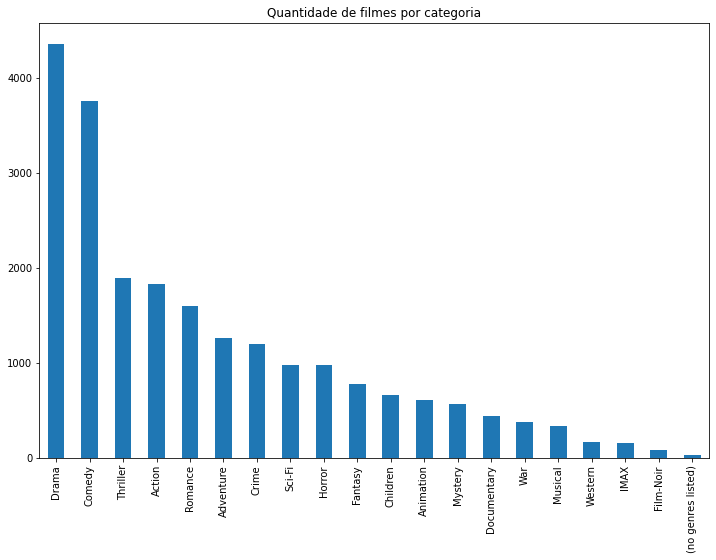

In [12]:
filmes_com_media['genres'].str.get_dummies('|').sum().sort_values(ascending=False).plot(
    kind = 'bar',
    title = 'Quantidade de filmes por categoria',
    figsize = (12,8))

#Melhorando gráficos com Seaborn

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


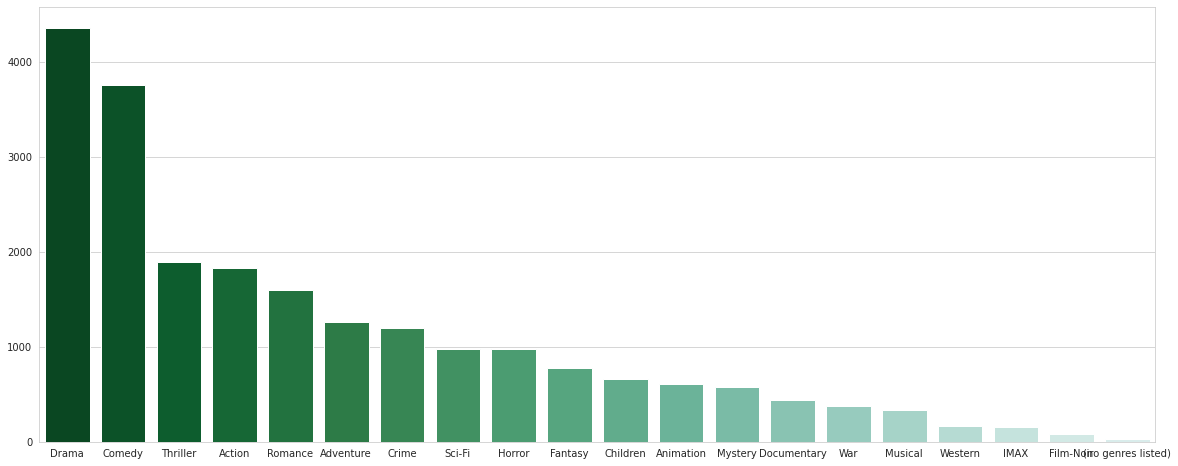

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

filmes_por_genero = filmes_com_media['genres'].str.get_dummies('|').sum().sort_values(ascending=False)
plt.figure(figsize=(20,8))
sns.barplot(x = filmes_por_genero.index,
            y = filmes_por_genero.values,
            palette= sns.color_palette("BuGn_r", n_colors = len(filmes_por_genero) + 4))
plt.show()

#Buscando um filme por partes do título

Por exemplo, para buscar 'O poderoso chefão' na base de dados, vamos aplicar o filtro 'contém "Godfather"' na coluna title.

In [14]:
filmes_com_media[filmes_com_media['title'].str.contains("Godfather")]

,movieId,title,genres,avg rating,reviews
659,858,"Godfather, The (1972)",Crime|Drama,4.29,192.0
922,1221,"Godfather: Part II, The (1974)",Crime|Drama,4.26,129.0
1498,2023,"Godfather: Part III, The (1990)",Crime|Drama|Mystery|Thriller,3.36,45.0
5248,8607,Tokyo Godfathers (2003),Adventure|Animation|Drama,3.90,5.0
9541,172591,The Godfather Trilogy: 1972-1990 (1992),(no genres listed),4.75,2.0


#Visualizando as avaliações de um filme

4.2890625


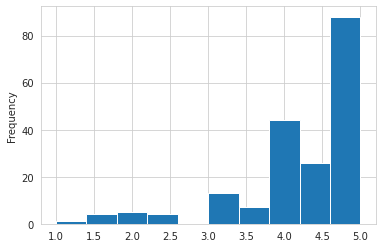

In [15]:
godfather = avaliacoes.query('movieId==858')['rating']
print(godfather.mean())
godfather.plot(kind='hist')

#Definindo uma função

Vamos criar uma função onde o usuário utiliza como argumento um movieID e a função retorna um histograma e conjunto de estatísticas descritivas.

In [0]:
def plot_filme(n):
  notas_do_filme = avaliacoes.query(f'movieId=={n}')['rating']
  notas_do_filme.plot(kind='hist')
  return notas_do_filme.describe()

count    129.000000
mean       4.259690
std        0.803072
min        1.000000
25%        4.000000
50%        4.500000
75%        5.000000
max        5.000000
Name: rating, dtype: float64

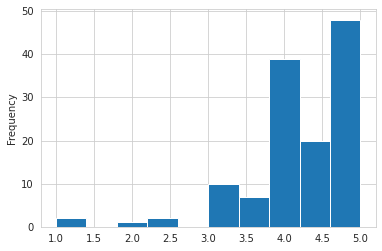

In [17]:
#Utilizando a função acima para analisar as avaliações de 'O poderoso chefão 2'
plot_filme(1221)

#Acrescentando Boxplot à função plot_filme()

In [0]:
def plot_filme(n):
  notas_do_filme = avaliacoes.query(f'movieId=={n}')['rating']
  notas_do_filme.plot(kind='hist')
  plt.show()
  print('\n')
  notas_do_filme.plot.box()
  plt.show()
  return notas_do_filme.describe()

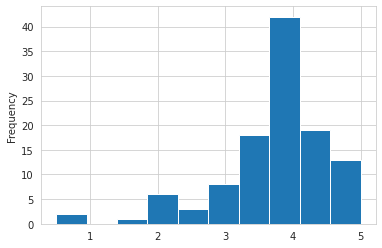

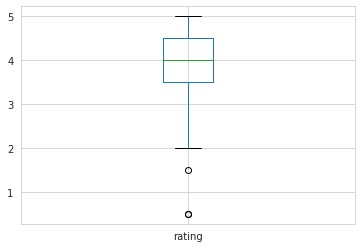

count    112.000000
mean       3.816964
std        0.890378
min        0.500000
25%        3.500000
50%        4.000000
75%        4.500000
max        5.000000
Name: rating, dtype: float64

In [19]:
#Analisando os reviews do filme 'A identidade Bourne'
plot_filme(5418)

In [20]:
filmes_com_media.sort_values('reviews', ascending=False)[100:110]

,movieId,title,genres,avg rating,reviews
3854,5418,"Bourne Identity, The (2002)",Action|Mystery|Thriller,3.82,112.0
2372,3147,"Green Mile, The (1999)",Crime|Drama,4.15,111.0
2983,3996,"Crouching Tiger, Hidden Dragon (Wo hu cang lon...",Action|Drama|Romance,3.84,110.0
307,349,Clear and Present Danger (1994),Action|Crime|Drama|Thriller,3.60,110.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,110.0
4935,7438,Kill Bill: Vol. 2 (2004),Action|Drama|Thriller,3.87,110.0
2195,2918,Ferris Bueller's Day Off (1986),Comedy,3.84,109.0
957,1258,"Shining, The (1980)",Horror,4.08,109.0
706,924,2001: A Space Odyssey (1968),Adventure|Drama|Sci-Fi,3.89,109.0
3562,4878,Donnie Darko (2001),Drama|Mystery|Sci-Fi|Thriller,3.98,109.0


#Visualizando boxplot de vários filmes com Seaborn

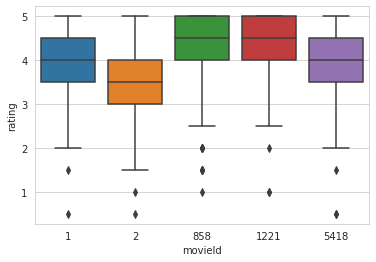

In [21]:
sns.boxplot(data = avaliacoes.query("movieId in [1,2,5418,858,1221]"), x = "movieId", y = "rating")

#Desafio 1

No gráfico de filmes por categoria, rotacionar os rótulos de forma a deixar o nome das categorias mais legíveis.

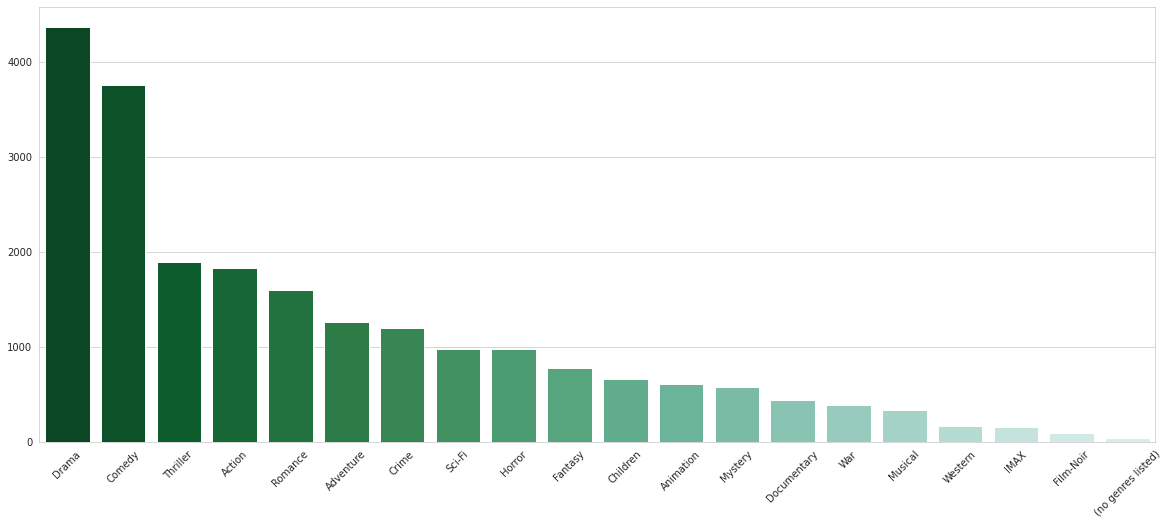

In [22]:
plt.figure(figsize=(20,8))
sns.barplot(x = filmes_por_genero.index,
            y = filmes_por_genero.values,
            palette= sns.color_palette("BuGn_r", n_colors = len(filmes_por_genero) + 4))
plt.xticks(rotation = 45)
plt.show()

#Desafio 2

Encontrar filmes com médias próximas e distribuições diferentes.

In [23]:
#Buscando filmes com médias próximas a partir da ordenação do data frame com a média das avaliações
filmes_com_media.sort_values('avg rating', ascending=False)[2500:2550]

,movieId,title,genres,avg rating,reviews
5725,27878,Born into Brothels (2004),Documentary,3.88,4.0
6223,45728,Clerks II (2006),Comedy,3.88,13.0
2357,3117,Ride with the Devil (1999),Drama|Romance|War,3.88,4.0
3899,5477,Sex and Lucia (Lucía y el sexo) (2001),Drama|Romance,3.88,4.0
5775,31410,"Downfall (Untergang, Der) (2004)",Drama|War,3.88,20.0
6151,44191,V for Vendetta (2006),Action|Sci-Fi|Thriller|IMAX,3.88,100.0
4118,5903,Equilibrium (2002),Action|Sci-Fi|Thriller,3.88,44.0
5625,27193,Taxi 2 (2000),Action|Comedy,3.88,4.0
1355,1844,Live Flesh (Carne trémula) (1997),Drama|Romance,3.88,4.0
6068,40955,Breakfast on Pluto (2005),Comedy|Drama,3.88,4.0


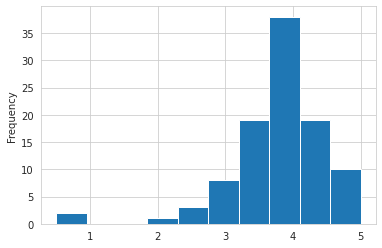

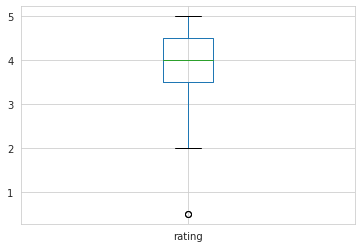

count    100.000000
mean       3.885000
std        0.787705
min        0.500000
25%        3.500000
50%        4.000000
75%        4.500000
max        5.000000
Name: rating, dtype: float64

In [24]:
#Analisando o filme 'V de Vingança'
plot_filme(44191)

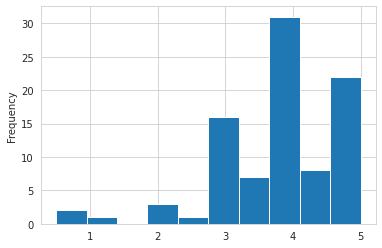

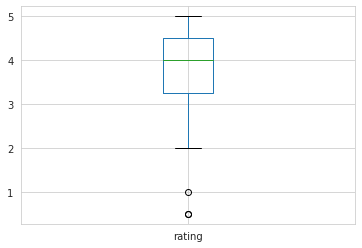

count    91.000000
mean      3.879121
std       0.989783
min       0.500000
25%       3.250000
50%       4.000000
75%       4.500000
max       5.000000
Name: rating, dtype: float64

In [25]:
#Analisando o filme 'Star Trek: Primeiro contato'
plot_filme(1356)

Os filmes **V de Vingança** e **Star Trek** apresentam a mesma avaliação média e um número próximo de avaliações no banco de dados, 100 e 91, respectivamente.

A maior diferença entre os filmes, no que diz respeito a como alcançaram a mesma avaliação média, é que **Star Trek** apresenta maior dispersão, com três baixos outliers e mais de 20 avaliações com nota máxima. Talvez essa seja uma características de franquias de longa data (os fãs leais amam, outros odeiam).
O histograma de **V de Vingança** se assemelha bastante a uma distribuição normal, com metade das avaliações entre 3.5 e 4.5.

#Desafio 3

Criar um boxplot dos 10 filmes com mais avaliações e analisá-los.

In [26]:
id_dos_filmes = filmes_com_media.sort_values('reviews', ascending=False)[0:10]
id_dos_filmes[['movieId','title']]

,movieId,title
314,356,Forrest Gump (1994)
277,318,"Shawshank Redemption, The (1994)"
257,296,Pulp Fiction (1994)
510,593,"Silence of the Lambs, The (1991)"
1939,2571,"Matrix, The (1999)"
224,260,Star Wars: Episode IV - A New Hope (1977)
418,480,Jurassic Park (1993)
97,110,Braveheart (1995)
507,589,Terminator 2: Judgment Day (1991)
461,527,Schindler's List (1993)


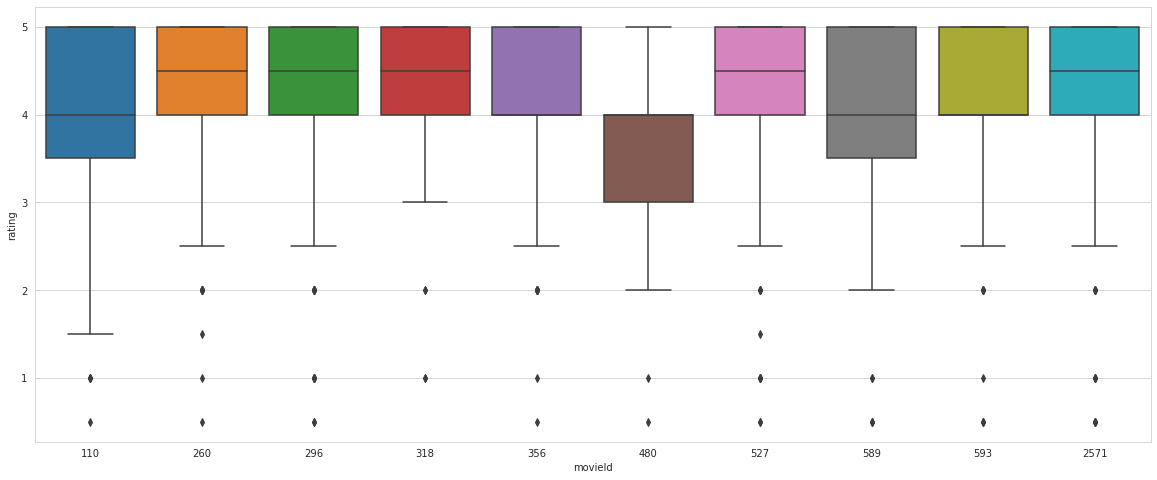

In [27]:
top_movieids = id_dos_filmes['movieId']
plt.figure(figsize=(20,8))
sns.boxplot(data = avaliacoes.query(f"movieId in @top_movieids"), x = "movieId", y = "rating")

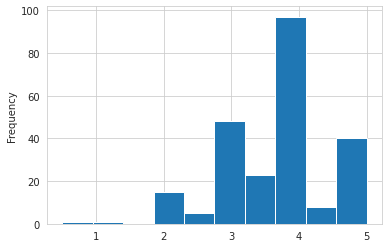

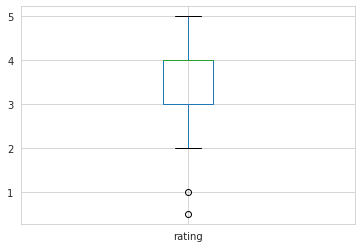

count    238.000000
mean       3.750000
std        0.855301
min        0.500000
25%        3.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: rating, dtype: float64

In [28]:
plot_filme(480)

**Ainda falta escrever uma análise do boxplot**

#Desafio 4

Configurar a visualização do boxplot gerado pelo seaborn (último boxplot plotado na aula). Configurar o tamanho e colocar o nome dos filmes nos ticks.

In [29]:
avaliacoes_e_titulos = avaliacoes.merge(filmes, on = 'movieId', how='left')
avaliacoes_e_titulos.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


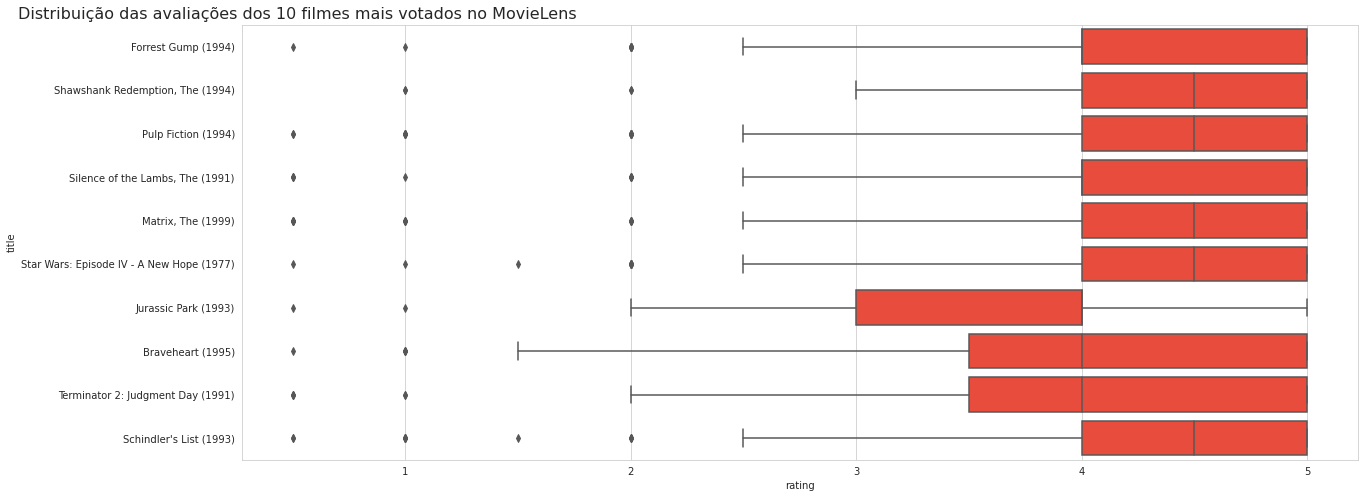

In [30]:
top_movietitles = id_dos_filmes['title']
plt.figure(figsize=(20,8))
sns.boxplot(data = avaliacoes_e_titulos.query(f"title in @top_movietitles"), x = "rating", y = "title", order=top_movietitles, color='#e74c3c', saturation = 1)
plt.title('Distribuição das avaliações dos 10 filmes mais votados no MovieLens', fontsize = 16, x =0.05) 
plt.show()

#Desafio 5

Calcular moda, média e mediana dos filmes. Explore filmes com notas mais próximas de 0.5, 3 e 5.

In [31]:
estatisticas_avaliacoes = avaliacoes.groupby('movieId')['rating'].agg([pd.Series.mean, pd.Series.median, pd.Series.mode])
estatisticas_avaliacoes.head()

,mean,median,mode
movieId,,,
1,3.920930,4.0,4
2,3.431818,3.5,4
3,3.259615,3.0,3
4,2.357143,3.0,3
5,3.071429,3.0,3


In [32]:
analise1 = estatisticas_avaliacoes[estatisticas_avaliacoes['mean']==0.5]
analise1.shape

(96, 3)

In [33]:
analise1 = analise1.join(numero_avaliacoes_filme, on='movieId')
analise1 = analise1.rename(columns={'rating':'reviews'})
analise1.head()

,mean,median,mode,reviews
movieId,,,,
3604,0.5,0.5,0.5,1
3933,0.5,0.5,0.5,1
4051,0.5,0.5,0.5,1
4371,0.5,0.5,0.5,1
4580,0.5,0.5,0.5,2


In [34]:
analise1.describe()

,mean,median,reviews
count,96.0,96.0,96.000000
mean,0.5,0.5,1.020833
std,0.0,0.0,0.143576
min,0.5,0.5,1.000000
25%,0.5,0.5,1.000000
50%,0.5,0.5,1.000000
75%,0.5,0.5,1.000000
max,0.5,0.5,2.000000


In [35]:
analise2 = estatisticas_avaliacoes[estatisticas_avaliacoes['mean']==3.0]
analise2 = analise2.join(numero_avaliacoes_filme, on='movieId')
analise2 = analise2.rename(columns={'rating':'reviews'})
analise2.describe()

,mean,median,reviews
count,917.0,917.000000,917.000000
mean,3.0,3.017448,2.371865
std,0.0,0.136114,4.067417
min,3.0,2.000000,1.000000
25%,3.0,3.000000,1.000000
50%,3.0,3.000000,1.000000
75%,3.0,3.000000,2.000000
max,3.0,4.000000,61.000000


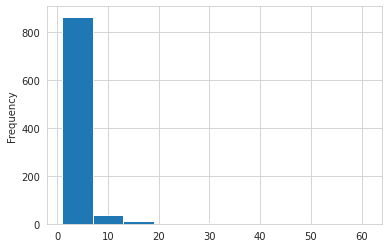

In [36]:
analise2['reviews'].plot(kind='hist')

In [37]:
analise3 = estatisticas_avaliacoes[estatisticas_avaliacoes['mean']==5.0]
analise3 = analise3.join(numero_avaliacoes_filme, on='movieId')
analise3 = analise3.rename(columns={'rating':'reviews'})
analise3.describe()

,mean,median,reviews
count,296.0,296.0,296.000000
mean,5.0,5.0,1.023649
std,0.0,0.0,0.152209
min,5.0,5.0,1.000000
25%,5.0,5.0,1.000000
50%,5.0,5.0,1.000000
75%,5.0,5.0,1.000000
max,5.0,5.0,2.000000


Os filmes com avalições médias nos extremos 0.5 e 5.0 são aqueles que receberam no máximo 2 avaliações. Ao todo 392 filmes da nossa base de dados encontram-se nessa situação e é recomendável não considerá-los, pois essas médias carecem de consistência.

Nos filmes com média 3.5 a situação não é muito diferente. Dos 917 títulos filtrados, mais de 800 estão com apenas um review.

Ideal seria analisar melhor a variável reviews em toda a base e estabelecer um corte.

#Desafio 6

Plotar o boxplot e o histograma um do lado do outro (na mesma figura ou em figuras distintas, mas um do lado do outro).

In [0]:
#A função que faz isso é subplot
#The parameters for subplot are: number of rows, number of columns, and which subplot you're currently on.
#So 1, 2, 1 means "a 1-row, 2-column figure: go to the first subplot." Then 1, 2, 2 means "a 1-row, 2-column figure: go to the second subplot."

def plot_filme_v2(n):
  plt.figure(figsize=(20,8))
  graf1 = plt.subplot(1,2,1)
  notas_do_filme = avaliacoes.query(f'movieId=={n}')['rating']
  notas_do_filme.plot(kind='hist')
  #plt.show()
  #print('\n')
  graf1 = plt.subplot(1,2,2)
  notas_do_filme.plot.box()
  plt.show()
  #return notas_do_filme.describe()

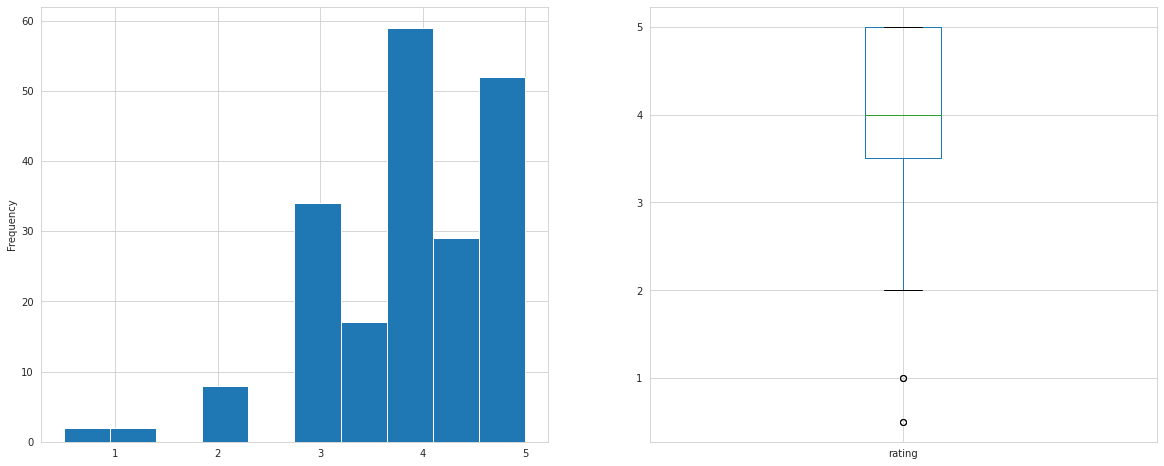

In [39]:
#filme "Seven"
plot_filme_v2(47)

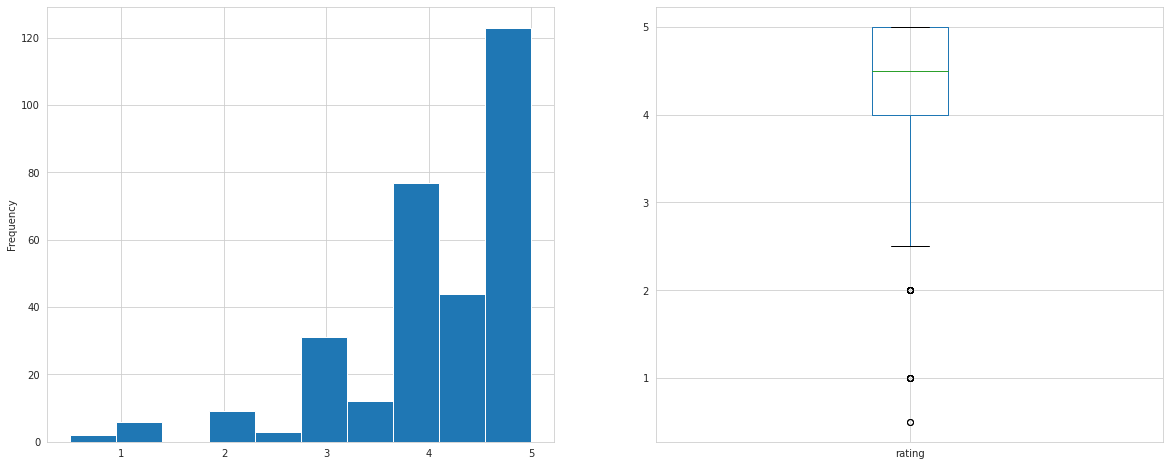

In [40]:
#Pulp Fiction
plot_filme_v2(296)

No Slack alguns colegas melhoraram a função plot_filme, para mostrar vários filmes ao mesmo tempo, com um título informando o nome do filme.

In [0]:
def plot_filme_v3(n):
  count = 0
  for id in n:
    count += 1
    plt.figure(figsize=(20,8))
    nome_filme = filmes.query(f"movieId == {id}")["title"].values
    print(f"Dados do filme: {nome_filme}")
    ax1 = plt.subplot(count,2,1)
    notas_do_filme = avaliacoes.query(f"movieId == {id}")["rating"]
    notas_do_filme.plot(kind='hist')
    ax2 = plt.subplot(count,2,2)
    notas_do_filme.plot.box()
    plt.show()
    #notas_do_filme.describe()
    print('\n')

Dados do filme: ['Seven (a.k.a. Se7en) (1995)']


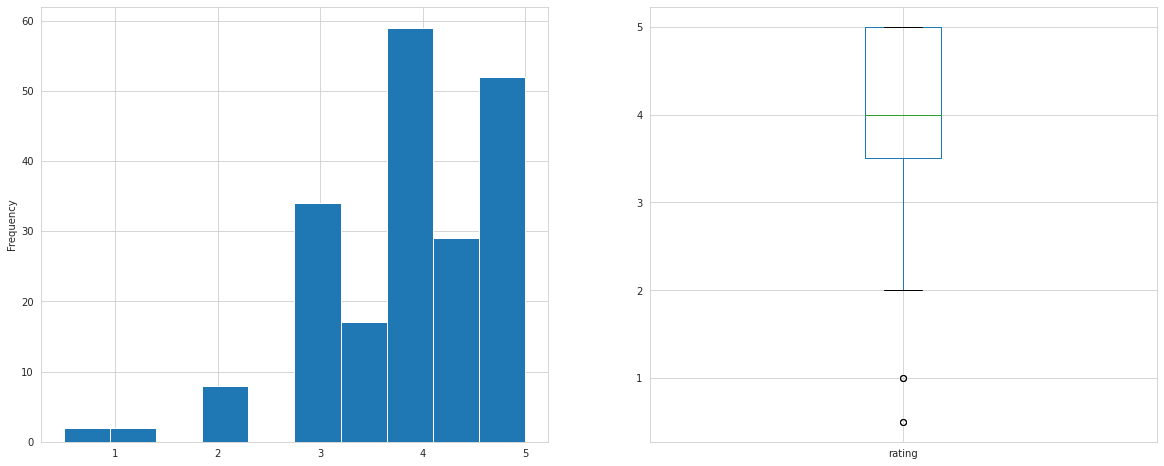



Dados do filme: ['Pulp Fiction (1994)']


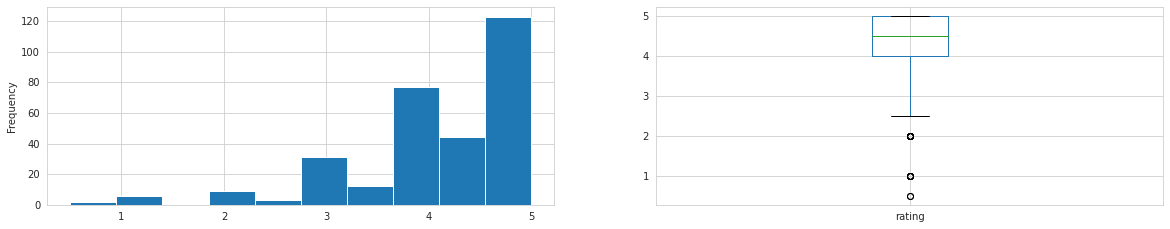

In [42]:
list_ids = [47,296]
plot_filme_v3(list_ids)

#Desafio 7

Criar um gráfico de notas médias por ano (média geral considerando todos os filmes lançados naquele ano).

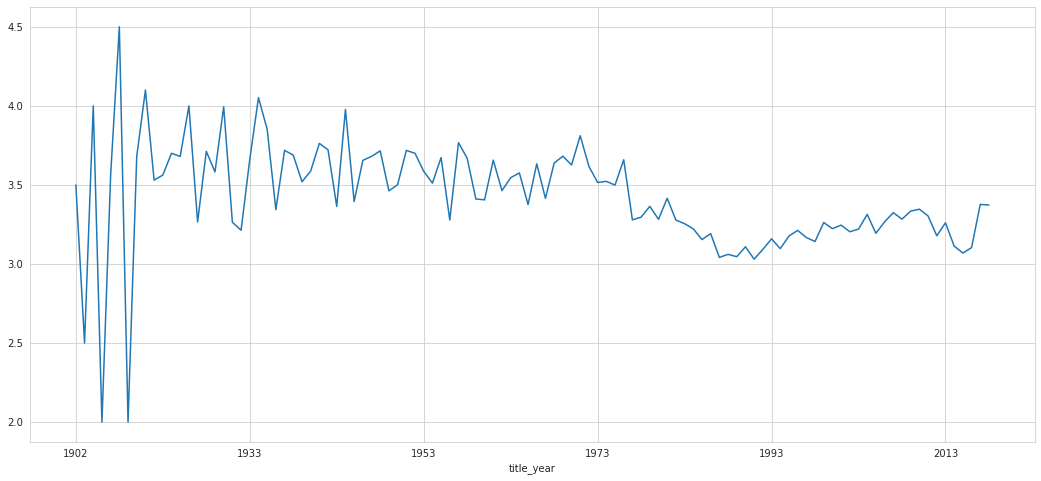

In [44]:
filmes_com_media['title_year'] = filmes_com_media['title'].str.extract("\((\d{4})\)") #regex para extrair os 4 dígitos do ano entre parênteses
nota_media_por_ano = filmes_com_media.groupby('title_year')['avg rating'].mean()

plt.figure(figsize=(18, 8))
nota_media_por_ano.plot()